## Importando bibliotecas

In [18]:
# Ocultando mensagens do sistema
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas iniciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Inspeção Inicial dos dados

Os dados deste dataset foram preparados neste mesmo repositório do GitHub, em um notebook nomeado `Dataset.jpynb` , onde foram concatenados cerca de cinco datasets com avaliações de restaurantes em diferentes países.

In [19]:
data = pd.read_csv('/content/drive/MyDrive/CSVs/restaurantes.csv')
df = pd.DataFrame(data)

In [20]:
print(f"\n↳ Quantidade de linhas: {df.shape[0]}")
print(f"↳ Quantidade de colunas: {df.shape[1]}\n")
df.head(3)


↳ Quantidade de linhas: 2299006
↳ Quantidade de colunas: 13



,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,0,1,Chalito_Rambla,1,Negative,review_774086112,Terrible food Terrible service,"Ok, this place is terrible! Came here bc we’ve...","Ok, this place is terrible! Came here bc we’ve...","October 12, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,1,2,Chalito_Rambla,5,Positive,review_739142140,The best milanesa in central Barcelona,This place was a great surprise. The food is d...,This place was a great surprise. The food is d...,"January 14, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,2,3,Chalito_Rambla,5,Positive,review_749758638,Family bonding,The food is excellent.....the ambiance is very...,The food is excellent.....the ambiance is very...,"March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299006 entries, 0 to 2299005
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       object
 1   parse_count      object
 2   restaurant_name  object
 3   rating_review    object
 4   sample           object
 5   review_id        object
 6   title_review     object
 7   review_preview   object
 8   review_full      object
 9   date             object
 10  city             object
 11  url_restaurant   object
 12  author_id        object
dtypes: object(13)
memory usage: 228.0+ MB


## Limpeza, Manipulação e Preparação

Para este projeto, irei precisar apenas de algumas colunas desse dataset, sendo elas:

- `rating_review` é utilizada para analisar a pontuação do usuário, de `1` à `5` (do pior para o melhor).
- `sample` é a coluna que contém uma avaliação de sentimento do comentário, sendo ela `Negative` ou `Positive` .
- `review_full` contém o comentário completo dos usuário em relação ao restaurante, todos eles estão em inglês.

**Objetivos Iniciais**
- Criar um novo DataFrame com as 3 tabelas citadas acima, renomeando-as para se encaixar melhor ao propósito deste projeto.
- Identificar se existe um desbalanceamento na quantidade de avaliações positivas e negativas.
- Estudar o impacto das pontuações de `1` à `5` e estudar possibilidade de classificar um novo sentimento como `Neutral` .


In [22]:
# Preparando novo dataframe com as colunas 'rating_review', 'sample' e 'review_full'
df_pln = df[['rating_review', 'sample', 'review_full']]

# Renomenado colunas
df_pln = df_pln.rename(columns={'rating_review': 'ratings', 'sample': 'sentiments', 'review_full': 'reviews'})

df_pln.head()

,ratings,sentiments,reviews
0,1,Negative,"Ok, this place is terrible! Came here bc we’ve..."
1,5,Positive,This place was a great surprise. The food is d...
2,5,Positive,The food is excellent.....the ambiance is very...
3,5,Positive,"The food is execellent ,affortable price for p..."
4,5,Positive,"Mr Suarez,The food at your restaurant was abso..."


In [23]:
# Contagem de valores categóricos
df_categ = df_pln.groupby(['ratings', 'sentiments']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_categ

,ratings,sentiments,Count
4,5,Positive,967675
3,4,Positive,463400
2,3,Negative,195109
14,5.0,Positive,152572
13,5,Positive,136330
0,1,Negative,75039
1,2,Negative,73495
11,4,Positive,70712
12,4.0,Positive,67053
9,3,Negative,39131


In [24]:
# Removendo contagens menor ou igual a 2
df_categ = df_categ[df_categ['Count'] > 2]

# Transformando a coluna 'rating' em float
df_categ['ratings'] = df_categ['ratings'].astype(float)

# Agregando a coluna em rating
df_rating = df_categ.groupby(['ratings', 'sentiments']).agg({'Count': 'sum'}).reset_index()
df_rating.sort_values(by='ratings', ascending=False)

,ratings,sentiments,Count
4,5.0,Positive,1256577
3,4.0,Positive,601165
2,3.0,Negative,257145
1,2.0,Negative,92307
0,1.0,Negative,91793


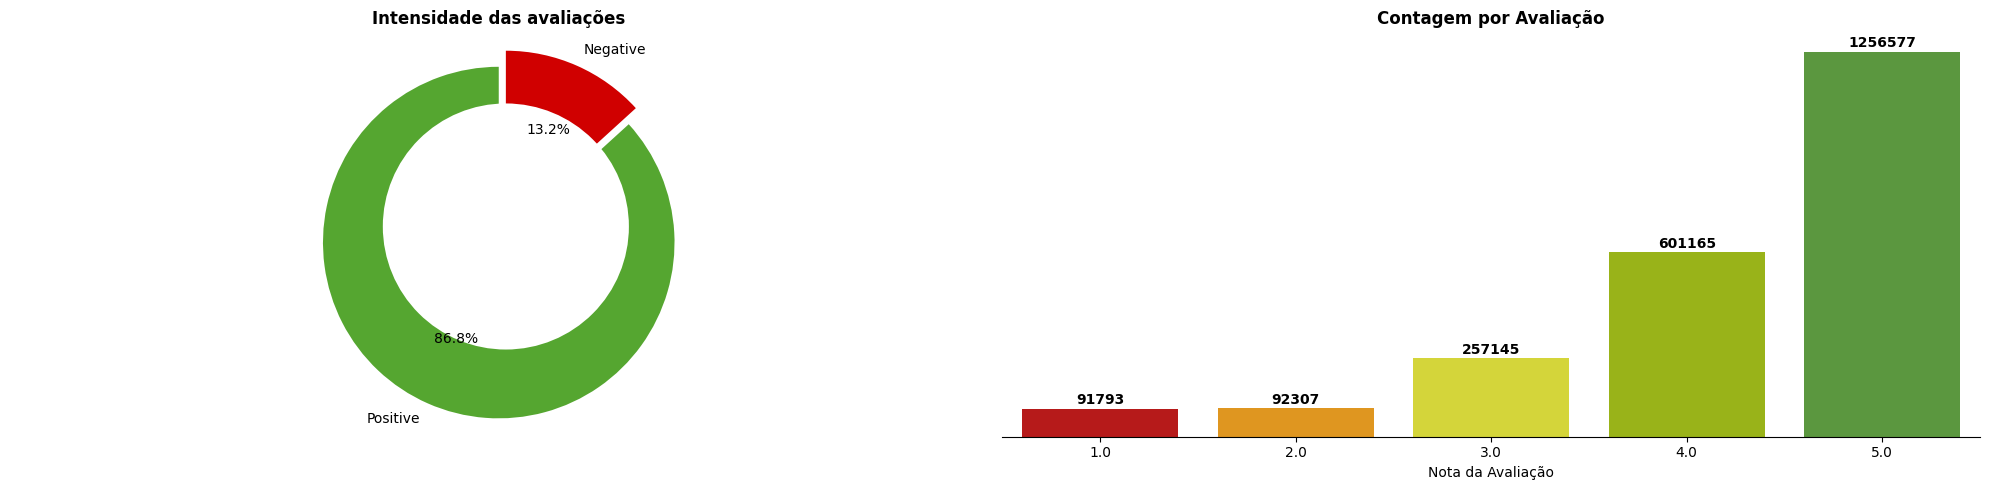

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Primeiro subplot: Gráfico de pizza (sentimentos)
positive_count = df_rating.loc[df_rating['sentiments'] == 'Positive', 'Count'].values[0]
negative_count = df_rating.loc[df_rating['sentiments'] == 'Negative', 'Count'].values[0]
labels_rev = ['Positive', 'Negative']
colors_rev = ['#55a630', '#d00000']
explode = (0.1, 0)

axes[0].pie([positive_count, negative_count], labels=labels_rev, colors=colors_rev, autopct='%1.1f%%', startangle=90, explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white', transform=axes[0].transData._b)
axes[0].add_artist(centre_circle)
axes[0].set_title('Intensidade das avaliações', fontweight='bold')
axes[0].axis('equal')

# Segundo subplot: Gráfico de barras (contagem por avaliação)
cores = ['#d00000', '#ff9e00', '#eeef20', '#aacc00', '#55a630']

ax = sns.barplot(x=df_rating['ratings'], y=df_rating['Count'], palette=cores, ax=axes[1])

axes[1].set_title('Contagem por Avaliação', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Nota da Avaliação')
axes[1].set_ylabel('Contagem')

for i in range(len(df_rating['ratings'])):
    axes[1].annotate(f'{df_rating["Count"][i]:.0f}'.replace('.', ','),
                (i, df_rating['Count'][i]),
                ha="center",
                xytext=(0, 3),
                textcoords="offset points",
                fontweight='bold')

# Ocultando eixos e algumas bordas
axes[1].yaxis.set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["left"].set_visible(False)
axes[1].spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

Existe um grande desbalanceamento das avaliações

In [26]:
df_rating = df_rating.drop('Count', axis=1)
df_rating = df_rating.reset_index(drop=True)
df_pln = df_pln.reset_index(drop=True)

df_pln = pd.merge(df_rating, df_pln[['ratings', 'sentiments', 'reviews']], on=['ratings', 'sentiments'], how='left')
df_pln['ratings'] = df_pln['ratings'].astype(int)

In [27]:
df_pln.head(3)

,ratings,sentiments,reviews
0,1,Negative,"Ok, this place is terrible! Came here bc we’ve..."
1,1,Negative,I always enjoyed above the average-to-outstand...
2,1,Negative,second visit there and i am very disapointed t...


In [28]:
# Porcentagem de valores faltantes
percentage_missing = ((df_pln.isnull().sum() / df_pln.shape[0]) * 100).sort_values(ascending=False)
print(f"Porcentagem de valores ausentes:\n{percentage_missing.apply(lambda x: f'{x:.2f}')}")

Porcentagem de valores ausentes:
reviews       1.93
ratings       0.00
sentiments    0.00
dtype: object


In [29]:
# Observando os valores ausentes
df_pln[df_pln['reviews'].isnull()].head()

,ratings,sentiments,reviews
265449,3,Negative,NaN
265450,3,Negative,NaN
265451,3,Negative,NaN
265452,3,Negative,NaN
265453,3,Negative,NaN


In [30]:
# Dropando valores ausentes
df_pln = df_pln.dropna()
print(f"Quantidade de valores ausentes:\n{df_pln.isna().sum()}")

Quantidade de valores ausentes:
ratings       0
sentiments    0
reviews       0
dtype: int64


In [31]:
# Observando comentários com avaliação em 3 e convertendo para tabela interativa
from google.colab import data_table

data_table.enable_dataframe_formatter()

df_pln.loc[df_pln['ratings'] == 3].head(10)

,ratings,sentiments,reviews
148534,3,Negative,We went there for dinner further a friend’s re...
148535,3,Negative,"Um, how this joint has this many 5 star review..."
148536,3,Negative,I am so confused by the positive reviews of th...
148537,3,Negative,"The food was really good - but for us, the ove..."
148538,3,Negative,This is really a 3 and a 1/2. The portions are...
148539,3,Negative,Decent food with a super friendly staff. Price...
148540,3,Negative,We came here on our first night in Barcelona (...
148541,3,Negative,The food here was average. There were no veget...
148542,3,Negative,We were taken here by a friend who lives in Ba...
148543,3,Negative,Arrived as the restaurant opended up. Had the ...


In [32]:
df_pln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1740454 entries, 0 to 1774717
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ratings     int64 
 1   sentiments  object
 2   reviews     object
dtypes: int64(1), object(2)
memory usage: 53.1+ MB
